# Parsing sensorstream data into something actually useable

### Parsing functions

In [1]:
import numpy as np
import csv
import pandas as pd

def parse_csv_to_pandas(fpath):
    with open(fpath, 'r') as file:
        reader = csv.reader(file)
        dataframe_rows = [[float(element) for element in row] for row in reader]

    n_tpts = len(dataframe_rows)

    dataframe = pd.DataFrame(data = {
        'time': list(np.full((n_tpts, 1), np.nan)),
        'gps': list(np.full((n_tpts,3), np.nan)),
        'unknown1': list(np.full((n_tpts, 1), np.nan)),
        'accelerometer': list(np.full((n_tpts, 3), np.nan)),
        'unknown2': list(np.full((n_tpts, 3), np.nan)),
        'magnetic_field': list(np.full((n_tpts, 3), np.nan)),
        'unknown3': list(np.full((n_tpts, 3), np.nan)),
        'unknown4': list(np.full((n_tpts, 3), np.nan)),
        'unknown5': list(np.full((n_tpts, 1), np.nan)),
    })

    for row_num, row in enumerate(dataframe_rows):
        dataframe.iat[row_num,0] = row[0]
        splits = [row[i:i + 4] for i in range(1, len(row), 4)]
        for i in range(1,9):
            for split in splits:
                if int(split[0]) == i:
                    dataframe.iat[row_num,i] = split[1:]

    return dataframe

def pandas_to_numpy(dataframe, keys):
    np_datasets = []
    for key in keys:
        np_dataset = dataframe[key].values
        if not isinstance(np_dataset[0], float):
            np_dataset = np.array([list(row) for row in np_dataset])
        np_dataset = np_dataset.astype(np.float)
        np_datasets.append(np_dataset)
    return np_datasets

### Example parsing

NOTE: assumes data was collected with **only the first four boxes checked** (down through 'GPS Position').  Will probably require some modification to work for other data.

In [2]:
fpath = '/home/hunter/hunter_sync/space/undergrad_work/hunterh/notes/gps_tests/test_5_app_comparison/mystream_9_8_4_37_21.csv'
dataframe = parse_csv_to_pandas(fpath)

In [3]:
time, gps, accelerometer = pandas_to_numpy(dataframe, ['time', 'gps', 'accelerometer'])

### Remove nans (timepoints where we didn't have any data for that sensor)

In [4]:
time[~np.isnan(time)]

array([2850717.29133, 2850717.29383, 2850717.29633, ..., 2851030.42931,
       2851030.43185, 2851030.43438])

In [5]:
gps[np.isnan(gps).sum(axis=1) < 3]

array([], shape=(0, 3), dtype=float64)

In [6]:
accelerometer[np.isnan(accelerometer).sum(axis=1) < 3]

array([[ 6.400e-02,  3.096e+00,  9.428e+00],
       [-3.000e-03,  3.087e+00,  9.430e+00],
       [ 6.000e-03,  3.096e+00,  9.296e+00],
       ...,
       [ 8.230e-01,  5.546e+00,  8.652e+00],
       [ 7.340e-01,  5.668e+00,  8.676e+00],
       [ 6.910e-01,  5.680e+00,  8.623e+00]])

### Visualizations

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

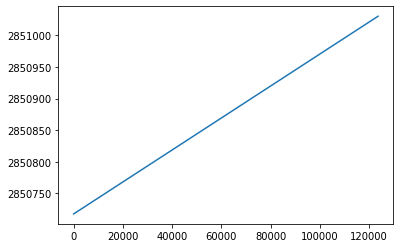

In [8]:
plt.plot(time);

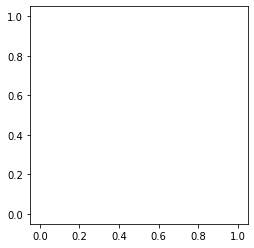

In [9]:
lat, long, elevation = gps[np.isnan(gps).sum(axis=1) < 3].T
plt.plot(long, lat)
plt.gca().set_aspect('equal')

Print off GPS data in a format for directly pasting into the paste bin at https://www.gpsvisualizer.com/map_input

(copy the entire output, including 'latitude,longitude')

In [10]:
print('latitude,longitude,elevation')
for row in gps[np.isnan(gps).sum(axis=1) < 3]:
    print(f'{row[0]},{row[1]},{row[2]}')

latitude,longitude,elevation


/home/hunter/anaconda3/envs/pomlab/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


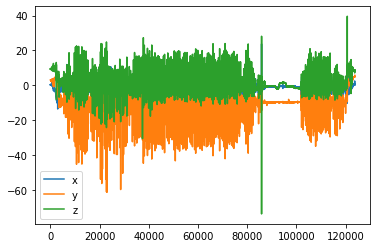

In [11]:
plt.plot(accelerometer)
plt.legend(['x', 'y', 'z']);